In [412]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
plt.style.use('classic')
%matplotlib inline

In [413]:
# Microbenchmark Measurement Data

json_fc = np.loadtxt(fname = "./data/json/fc_setup.log")
json_kernel = np.loadtxt(fname = "./data/json/kernel.log")
json_init = np.loadtxt(fname = "./data/json/init.log")
json_python = np.loadtxt(fname = "./data/json/python.log")
json_import = np.loadtxt(fname = "./data/json/import.log")
json_app = np.loadtxt(fname = "./data/json/app.log")

base64_fc = np.loadtxt(fname = "./data/base64/fc_setup.log")
base64_kernel = np.loadtxt(fname = "./data/base64/kernel.log")
base64_init = np.loadtxt(fname = "./data/base64/init.log")
base64_python = np.loadtxt(fname = "./data/base64/python.log")
base64_import = np.loadtxt(fname = "./data/base64/import.log")
base64_app = np.loadtxt(fname = "./data/base64/app.log")

http_fc = np.loadtxt(fname = "./data/http/fc_setup.log")
http_kernel = np.loadtxt(fname = "./data/http/kernel.log")
http_init = np.loadtxt(fname = "./data/http/init.log")
http_python = np.loadtxt(fname = "./data/http/python.log")
http_import = np.loadtxt(fname = "./data/http/import.log")
http_app = np.loadtxt(fname = "./data/http/app.log")

primes_fc = np.loadtxt(fname = "./data/primes/fc_setup.log")
primes_kernel = np.loadtxt(fname = "./data/primes/kernel.log")
primes_init = np.loadtxt(fname = "./data/primes/init.log")
primes_python = np.loadtxt(fname = "./data/primes/python.log")
primes_import = np.loadtxt(fname = "./data/primes/import.log")
primes_app = np.loadtxt(fname = "./data/primes/app.log")

markdown2html_fc = np.loadtxt(fname = "./data/markdown2html/fc_setup.log")
markdown2html_kernel = np.loadtxt(fname = "./data/markdown2html/kernel.log")
markdown2html_init = np.loadtxt(fname = "./data/markdown2html/init.log")
markdown2html_python = np.loadtxt(fname = "./data/markdown2html/python.log")
markdown2html_import = np.loadtxt(fname = "./data/markdown2html/import.log")
markdown2html_app = np.loadtxt(fname = "./data/markdown2html/app.log")

sentiment_fc = np.loadtxt(fname = "./data/sentiment/fc_setup.log")
sentiment_kernel = np.loadtxt(fname = "./data/sentiment/kernel.log")
sentiment_init = np.loadtxt(fname = "./data/sentiment/init.log")
sentiment_python = np.loadtxt(fname = "./data/sentiment/python.log")
sentiment_import = np.loadtxt(fname = "./data/sentiment/import.log")
sentiment_app = np.loadtxt(fname = "./data/sentiment/app.log")

In [414]:
def check_size(fc_setup,kernel,init,py, im,app):
    assert(len(fc_setup)==len(kernel)==len(init)==len(py)==len(im)==len(app))

In [415]:
def preprocess(kernel,init,py, im,app):
    return kernel, init-kernel,  py-init, im-py,app-im

In [416]:
check_size(json_fc, json_kernel, json_init, json_python, json_import, json_app)
check_size(base64_fc, base64_kernel, base64_init, base64_python, base64_import, base64_app)
check_size(primes_fc, primes_kernel, primes_init, primes_python, primes_import, primes_app)
check_size(http_fc, http_kernel, http_init, http_python, http_import, http_app)
check_size(markdown2html_fc, markdown2html_kernel, markdown2html_init, markdown2html_python, markdown2html_import, markdown2html_app)
check_size(sentiment_fc, sentiment_kernel, sentiment_init, sentiment_python, sentiment_import, sentiment_app)

In [417]:
#json_app = json_app - json_import; json_import = json_import - json_unzip;json_unzip = json_unzip - json_init; json_init = json_init - json_kernel
(json_kernel, json_init, json_python, json_import, json_app) = preprocess(json_kernel, json_init, json_python, json_import, json_app)
(base64_kernel, base64_init, base64_python, base64_import, base64_app) = preprocess(base64_kernel, base64_init, base64_python, base64_import, base64_app)
(primes_kernel, primes_init, primes_python, primes_import, primes_app) = preprocess(primes_kernel, primes_init, primes_python, primes_import, primes_app)
(http_kernel, http_init, http_python, http_import, http_app) = preprocess(http_kernel, http_init, http_python, http_import, http_app)
(markdown2html_kernel, markdown2html_init, markdown2html_python, markdown2html_import, markdown2html_app) = preprocess(markdown2html_kernel, markdown2html_init, markdown2html_python, markdown2html_import, markdown2html_app)
(sentiment_kernel, sentiment_init, sentiment_python, sentiment_import, sentiment_app) = preprocess(sentiment_kernel, sentiment_init,  sentiment_python, sentiment_import, sentiment_app)

In [418]:
fave = np.array([np.mean(json_fc), np.mean(base64_fc), np.mean(http_fc), np.mean(primes_fc), np.mean(markdown2html_fc), np.mean(sentiment_fc)])
kave = np.array([np.mean(json_kernel), np.mean(base64_kernel), np.mean(http_kernel), np.mean(primes_kernel), np.mean(markdown2html_kernel), np.mean(sentiment_kernel)])
iave = np.array([np.mean(json_init), np.mean(base64_init), np.mean(http_init), np.mean(primes_init), np.mean(markdown2html_init), np.mean(sentiment_init)])
pave = np.array([np.mean(json_python), np.mean(base64_python), np.mean(http_python), np.mean(primes_python), np.mean(markdown2html_python), np.mean(sentiment_python)])
mave = np.array([np.mean(json_import), np.mean(base64_import), np.mean(http_import), np.mean(primes_import), np.mean(markdown2html_import), np.mean(sentiment_import)])
aave = np.array([np.mean(json_app), np.mean(base64_app), np.mean(http_app), np.mean(primes_app), np.mean(markdown2html_app), np.mean(sentiment_app)])

In [419]:
app_std = np.array([np.std(json_app), np.std(base64_app), np.std(http_app), np.std(primes_app), np.std(markdown2html_app), np.std(sentiment_app)])
app_std

array([  0.55619798,   2.91163184,   0.47707442, 171.86386328,
         1.45137651,   2.52079353])

In [420]:
sys_setup_pctg = (fave+kave+iave+pave)/(fave+kave+iave+pave+mave+aave)
sys_setup_pctg = sys_setup_pctg*100
sys_setup_pctg


array([93.29973393, 22.16992769, 97.3116284 , 11.46197495, 44.6847001 ,
       32.54040549])

In [421]:
cwhite = '#fefaec'
ccyan = '#a9eee6'
cpurple = '#625772'
cred = '#f38181'
cgray = '#7A8B99'
cbrown = '#BEB7A4'

bar_width = 0.8
title_fz = 22.0
axis_fz = 18.0
tick_fz = 12.0

In [422]:
6%6

0

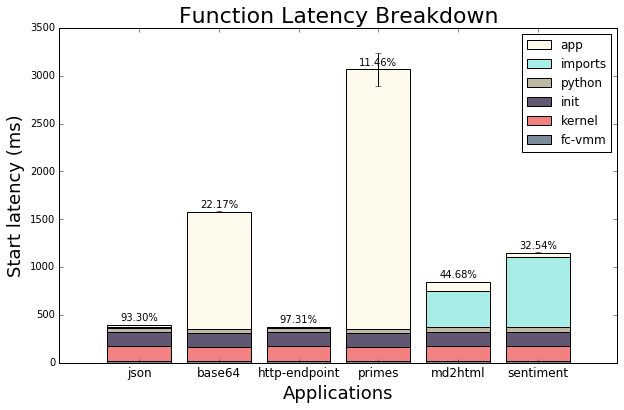

In [423]:
idx = ['json', 'base64','http-endpoint', 'primes', 'md2html','sentiment']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

bar0 = plt.bar(ind, aave, yerr= app_std, width=bar_width, label = 'app', color = cwhite, bottom = mave++pave+iave+kave+fave)
bar1 = plt.bar(ind, mave, width=bar_width, label = 'imports', color = ccyan, bottom = pave+iave+kave+fave)
bar2 = plt.bar(ind, pave, width=bar_width, label = 'python', color = cbrown, bottom = iave+kave+fave)
bar3 = plt.bar(ind, iave, width=bar_width, label = 'init', color = cpurple, bottom = kave+fave)
bar4 = plt.bar(ind, kave, width=bar_width, label = 'kernel', color = cred, bottom = fave)
bar5 = plt.bar(ind, fave, width=bar_width, label = 'fc-vmm', color = cgray)
plt.xticks(ind, idx, fontsize=tick_fz)
plt.ylabel("Start latency (ms)", fontsize=axis_fz)
plt.xlabel("Applications", fontsize=axis_fz)
plt.legend(loc = "upper right")
plt.title("Function Latency Breakdown", fontsize=title_fz)

bars = bar0+bar1+bar2+bar3+bar4+bar5
heights = np.zeros(6)
for i in range(0, len(bars)):
    heights[i%6] = heights[i%6]+bars[i].get_height()


for num, rect in enumerate(bar0):
    plt.text(rect.get_x() + rect.get_width()/2.0, heights[num]+20.0, '%.2f%%' % sys_setup_pctg[num], ha='center', va='bottom')

plt.savefig('workload_latency.eps', format="eps")
#plt.savefig('workload_latency.png', dpi=600)
#plt.show()


### Aggregate results for system setup stages (i.e., fc-vmm, kernel and init):

In [424]:
fc_all = np.concatenate((json_fc, base64_fc, http_fc, primes_fc, markdown2html_fc, sentiment_fc), axis=0)
kernel_all = np.concatenate((json_kernel, base64_kernel, http_kernel, primes_kernel, markdown2html_kernel, sentiment_kernel), axis=0)
init_all = np.concatenate((json_init, base64_init, http_init, primes_init, markdown2html_init, sentiment_init), axis=0)
python_all = np.concatenate((json_python, base64_python, http_python, primes_python, markdown2html_python, sentiment_python), axis=0)

In [425]:
sys_setup_avg = np.array([np.mean(fc_all), np.mean(kernel_all), np.mean(init_all), np.mean(python_all)])

In [426]:
sys_setup_std = np.array([np.std(fc_all), np.std(kernel_all), np.std(init_all), np.std(python_all)])

In [427]:
sys_setup_avg

array([ 16.3942953 , 155.59395973, 146.76174497,  46.06879195])

In [428]:
sys_setup_std

array([2.86272639, 6.14775267, 6.32457758, 8.00903218])

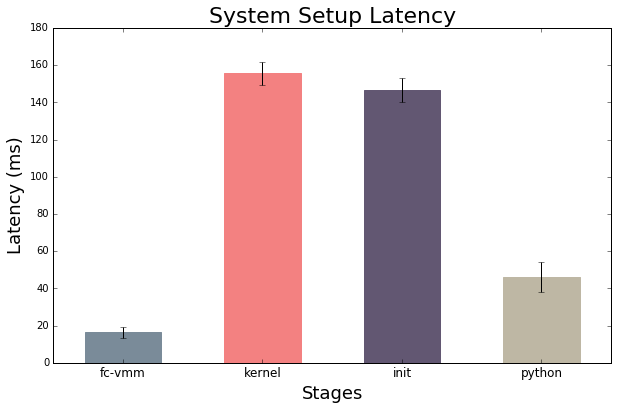

In [429]:
bar_width = 0.55
idx = ['fc-vmm', 'kernel', 'init', 'python']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

bars = plt.bar(ind, sys_setup_avg, yerr=sys_setup_std, width=bar_width)
bars[0].set_color(cgray)
bars[1].set_color(cred)
bars[2].set_color(cpurple)
bars[3].set_color(cbrown)
plt.xticks(ind, idx, fontsize=tick_fz)
plt.ylabel("Latency (ms)", fontsize=axis_fz)
plt.xlabel("Stages", fontsize=axis_fz)
plt.title("System Setup Latency", fontsize=title_fz)

#plt.savefig('sys_setup_latency_breakdown.png', dpi=600)
plt.savefig('sys_setup_latency_breakdown.eps', format="eps")
#plt.show()

### CDF

In [430]:
sys_setup_all = fc_all+kernel_all+init_all+python_all


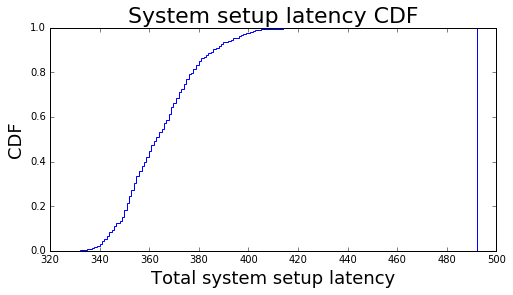

In [431]:
fig, ax = plt.subplots(figsize=(8, 4))
# plot the cumulative histogram
n, bins, patches = ax.hist(sys_setup_all, 500, density=True, histtype='step',
                           cumulative=True, label='Empirical')
ax.set_title('System setup latency CDF', fontsize=title_fz)
ax.set_xlabel('Total system setup latency', fontsize=axis_fz)
ax.set_ylabel('CDF', fontsize=axis_fz)
plt.savefig('sys_setup_latency_cdf.png', dpi=600)

## ExCamera Measurement

In [471]:
xc6f = [np.loadtxt(fname = "./data/xc-6f/fc_setup.log"), np.loadtxt(fname = "./data/xc-6f/kernel.log"), np.loadtxt(fname = "./data/xc-6f/init.log"), np.loadtxt(fname = "./data/xc-6f/app.log")]
xc12f = [np.loadtxt(fname = "./data/xc-12f/fc_setup.log"), np.loadtxt(fname = "./data/xc-12f/kernel.log"), np.loadtxt(fname = "./data/xc-12f/init.log"), np.loadtxt(fname = "./data/xc-12f/app.log")]
xc24f = [np.loadtxt(fname = "./data/xc-24f/fc_setup.log"), np.loadtxt(fname = "./data/xc-24f/kernel.log"), np.loadtxt(fname = "./data/xc-24f/init.log"), np.loadtxt(fname = "./data/xc-24f/app.log")]
xc120f = [np.loadtxt(fname = "./data/xc-120f/fc_setup.log"), np.loadtxt(fname = "./data/xc-120f/kernel.log"), np.loadtxt(fname = "./data/xc-120f/init.log"), np.loadtxt(fname = "./data/xc-120f/app.log")]


In [472]:
xc6f

[array([18., 15., 12., 11., 15., 12., 12., 12., 12., 14.]),
 array([139., 139., 135., 135., 135., 135., 136., 134., 135., 139.]),
 array([286., 289., 273., 283., 273., 281., 274., 274., 274., 285.]),
 array([2535., 2541., 2521., 2574., 2554., 2548., 2582., 2539., 2428.,
        2521.])]

In [473]:
def preprocess_l(data):
    for i in range(len(data)-1,1,-1):
        data[i] = data[i] - data[i-1]
    return data

In [474]:
xc6f = preprocess_l(xc6f)
xc12f = preprocess_l(xc12f)
xc24f = preprocess_l(xc24f)
xc120f = preprocess_l(xc120f)

In [475]:
xc6f_avg = list(map(np.mean, xc6f))
xc12f_avg = list(map(np.mean, xc12f))
xc24f_avg = list(map(np.mean, xc24f))
xc120f_avg = list(map(np.mean, xc120f))
xc24f_avg

[14.7, 137.4, 143.0, 5507.1]

In [476]:
xc_fcavg = np.array([xc120f_avg[0], xc24f_avg[0], xc12f_avg[0], xc6f_avg[0] ])
xc_kavg = np.array([xc120f_avg[1], xc24f_avg[1], xc12f_avg[1], xc6f_avg[1] ])
xc_iavg = np.array([xc120f_avg[2], xc24f_avg[2], xc12f_avg[2], xc6f_avg[2] ])
xc_aavg = np.array([xc120f_avg[3], xc24f_avg[3], xc12f_avg[3], xc6f_avg[3] ])
xc_aavg

array([48188.2,  5507.1,  4663.1,  2255.1])

In [477]:
xc_std = np.array([np.std(xc120f[3]), np.std(xc24f[3]),np.std(xc12f[3]),  np.std(xc6f[3])])
xc_std

array([6064.87997903, 1410.5224174 ,  120.33656967,   39.59911615])

Text(0.5, 1.0, 'Function Latency Breakdown')

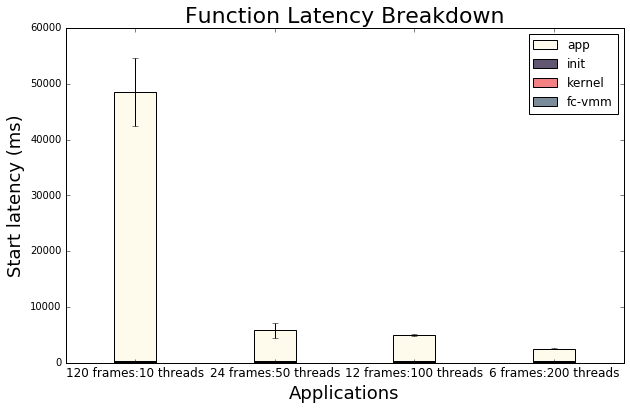

In [478]:
bar_width = 0.3

idx = ['120 frames:10 threads', '24 frames:50 threads', '12 frames:100 threads', '6 frames:200 threads']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

plt.bar(ind, xc_aavg,  yerr = xc_std, width=bar_width, label = 'app',color = cwhite, bottom = xc_iavg+xc_kavg+xc_fcavg)

plt.bar(ind, xc_iavg, width=bar_width, label = 'init', color = cpurple, bottom = xc_kavg+xc_fcavg)
plt.bar(ind, xc_kavg, width=bar_width, label = 'kernel', color = cred, bottom = xc_fcavg)
plt.bar(ind, xc_fcavg, width=bar_width, label = 'fc-vmm', color = cgray)
plt.xticks(ind, idx, fontsize=tick_fz)
plt.ylabel("Start latency (ms)", fontsize=axis_fz)
plt.xlabel("Applications", fontsize=axis_fz)
plt.legend(loc = "upper right")
plt.title("Function Latency Breakdown", fontsize=title_fz)

#plt.show()

In [479]:
xc_fcavg = np.array([xc24f_avg[0], xc12f_avg[0], xc6f_avg[0] ])
xc_kavg = np.array([xc24f_avg[1], xc12f_avg[1], xc6f_avg[1] ])
xc_iavg = np.array([xc24f_avg[2], xc12f_avg[2], xc6f_avg[2] ])
xc_aavg = np.array([xc24f_avg[3], xc12f_avg[3], xc6f_avg[3] ])

sys_pctg = (xc_fcavg+xc_kavg+xc_iavg)/(xc_fcavg+xc_kavg+xc_iavg+xc_aavg)
sys_pctg = sys_pctg * 100

xc_std = np.array([np.std(xc24f[3]),np.std(xc12f[3]),  np.std(xc6f[3])])
xc_std
sys_pctg_std = sys_pctg - (xc_fcavg+xc_kavg+xc_iavg)/(xc_fcavg+xc_kavg+xc_iavg+xc_aavg+xc_std)*100


In [481]:
sys_pctg

array([ 5.08600186,  6.02946214, 11.48139425])

In [482]:
sys_pctg_std

array([0.99462023, 0.14275362, 0.17573176])

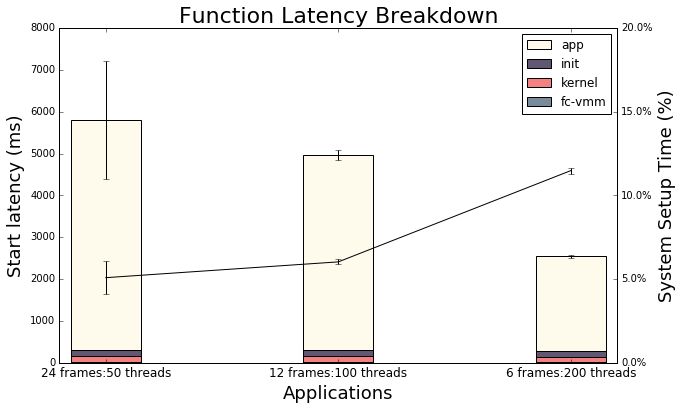

In [483]:
bar_width = 0.3

idx = ['24 frames:50 threads', '12 frames:100 threads', '6 frames:200 threads']
ind = [x for x, _ in enumerate(idx)]
plt.figure(figsize=(10,6))

plt.bar(ind, xc_aavg, yerr = xc_std, width=bar_width, label = 'app', color = cwhite, bottom = xc_iavg+xc_kavg+xc_fcavg)

plt.bar(ind, xc_iavg, width=bar_width, label = 'init', color = cpurple, bottom = xc_kavg+xc_fcavg)
plt.bar(ind, xc_kavg, width=bar_width, label = 'kernel', color = cred, bottom = xc_fcavg)
plt.bar(ind, xc_fcavg, width=bar_width, label = 'fc-vmm', color = cgray)
plt.xticks(ind, idx, fontsize=tick_fz)
plt.ylabel("Start latency (ms)", fontsize=axis_fz)
plt.xlabel("Applications", fontsize=axis_fz)
plt.legend(loc = "upper right")
plt.title("Function Latency Breakdown", fontsize=title_fz)



axes2 = plt.twinx()
axes2.errorbar(ind, sys_pctg, yerr = sys_pctg_std, color='k')
axes2.set_ylim(0, 20)
axes2.set_xlim(-0.2, 2.2)
axes2.set_ylabel('System Setup Time (%)', fontsize=axis_fz)
axes2.yaxis.set_major_formatter(PercentFormatter())
#plt.savefig('xc_latency_breakdown.png', dpi=600)
plt.savefig('xc_latency.eps', format="eps")
#plt.show()